In [1]:
import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
import seaborn as sns
import os
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
import pickle
from matplotlib.lines import Line2D

In [2]:
vars = ['u', 'v', 'w', 'p']
sigmas = [1, 2, 10]
DATA = np.zeros((len(sigmas), len(vars), 2))

for i, var in enumerate(vars):
    for j, sigma in enumerate(sigmas):
        filename = f'./data/fig5/L2data/{var}err{sigma}sigma.mat'
        data = scipy.io.loadmat(filename)
        err = data['err']
        exa = data['ex']
        relative_error = np.sqrt(np.sum(err, axis=0)/np.sum(exa, axis=0))
        DATA[j, i, :] = np.array([np.mean(relative_error), np.std(relative_error)])

In [3]:
# Color blind palette
sns.set_palette("colorblind")
palette = sns.color_palette("colorblind")

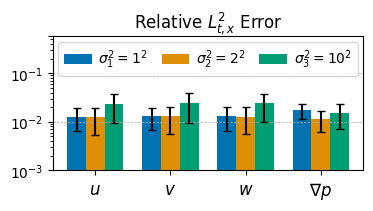

In [4]:
fig, ax = plt.subplots(figsize=(4,1.75))

x = np.arange(len(vars))
bar_width = 0.25

ax.bar(x - bar_width, DATA[0, :, 0], width=bar_width, label=f'$\sigma^2_1={sigmas[0]}^2$', color=palette[0])
ax.bar(x, DATA[1, :, 0], width=bar_width, label=f'$\sigma^2_2={sigmas[1]}^2$', color=palette[1])
ax.bar(x + bar_width, DATA[2, :, 0], width=bar_width, label=f'$\sigma^2_3={sigmas[2]}^2$', color=palette[2])

ax.errorbar(x - bar_width, DATA[0, :, 0], DATA[0, :, 1], color='black', fmt='None',capsize=3)
ax.errorbar(x, DATA[1, :, 0], DATA[1, :, 1], color='black', fmt='None',capsize=3)
ax.errorbar(x + bar_width, DATA[2, :, 0], DATA[2, :, 1], color='black', fmt='None',capsize=3)

ax.set_xticks(x)
ax.set_xticklabels([r'$u$', r'$v$', r'$w$', r'$\nabla p$'], fontsize=12)
ax.set_yscale('log')
ax.set_yticks([1e-3, 1e-2, 1e-1, 6e-1])

ax.yaxis.grid(True, linestyle='--', linewidth=0.5)

ax.set_title('Relative $L_{t,x}^2$ Error')

ax.legend(loc='upper center', ncol=3, columnspacing=1, handletextpad=0.5)

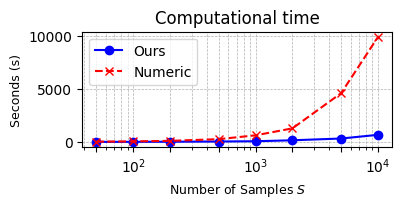

In [5]:
x = np.array([50,100,200,500,1000,2000,5000,10000])
net  = np.array([3.278, 8.078, 15.919, 37.577, 62.600, 152.608, 321.198, 668.629])
comp = np.array([23.379, 49.837, 101.571, 259.379, 622.995, 1279.354, 4613.734, 9927.945])

fig, ax = plt.subplots(figsize=(4, 1.5))
ax.plot(x, net, marker='o', label='Ours', color='b')
ax.plot(x, comp, marker='x', linestyle='--', label='Numeric', color='r')

ax.set_xscale('log')
ax.set_xticks(x)

label_fontsize = 9
title_fontsize = 14
ax.set_xlabel(r'Number of Samples $S$', fontsize=label_fontsize)
ax.set_ylabel('Seconds (s)', fontsize=label_fontsize)
ax.set_title('Computational time')

ax.legend(loc='best')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

In [7]:
Ns = [50, 100, 200, 500, 1000, 10000]
DATA = {}
for N in Ns:
    data = scipy.io.loadmat('./data/fig5/err_ensemble/mean' + str(N) + '.mat')
    DATA[N] = data[f'u{N}']

lep = scipy.io.loadmat('./data/fig5/err_ensemble/lep3d.mat')
lep = lep['lep']
lep = np.squeeze(lep, axis=0)

Ns = [50, 100, 200, 500, 1000]
Errors = {}
for i, N in enumerate(Ns):
    Errors[N] = (np.abs(DATA[N] - DATA[10000]) / lep) ** 2
    Errors[N] = Errors[N].reshape(10, -1)
    Errors[N] = (2/(17*18))**3 * np.sum(Errors[N], axis=1)
    Errors[N] = np.sqrt(np.mean(Errors[N]))

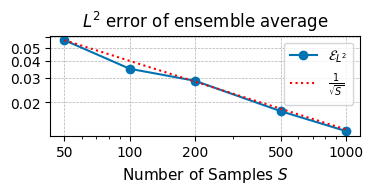

In [ ]:
fig, ax = plt.subplots(figsize=(4, 1.3))

ax.plot(Ns, Errors.values(), marker='o', label=r'$\mathcal{E}_{L^2}$')

y1 = np.sqrt(1 / np.array(Ns))
y1 = y1*Errors[50] / y1[0]
ax.plot(Ns, y1, color='r', linestyle=':', label=r'$\frac{1}{\sqrt{S}}$')

ax.set_xscale('log')
ax.set_yscale('log'
ax.set_xticks(Ns)
ax.set_xticklabels(['50', '100', '200', '500', '1000'])
ax.set_yticks([0.02, 0.03, 0.04, 0.05, 0.06])
ax.set_yticklabels(['0.02', '0.03', '0.04', '0.05', ''])

label_fontsize = 11
title_fontsize = 14
ax.set_xlabel(r'Number of Samples $S$', fontsize=label_fontsize)
ax.set_title(r'$L^2$ error of ensemble average')

ax.grid(True, linestyle='--', linewidth=0.5)
ax.legend()